In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set(style="white", color_codes=True)

#from google.colab import files
#uploaded = files.upload()

data = pd.read_csv("clean_data.csv")
data.head(50)




,age,average_age,gender,ethnicity,disabled,grew_up,vaccine_knowledge,profession,vaccinated_ever,covid_vaccinated,doubts_vaccination,reasons_for_doubt,would_get_vaccine,kids_should_be_vaccinated,email_address,participant_number,name,willingness,age_2,ethnicity_2,income,general_health,lives_alone,education,location_type
0,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Sara.Khan,4.0,29,Asian / Asian British,32000,Healthy,No,University,City
1,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Brian.O.Neill,3.0,67,White European / White British,18000,Physical Disability,No,GCSEs,City
2,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Chloe.Thomas,2.0,42,White European / White British,40000,Mental Disability,No,University,City
3,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,James.Patel,2.0,55,Asian / Asian British,75000,Healthy,No,University,City
4,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Elizabeth.Morris,5.0,80,White European / White British,21000,Physical Disability,Yes,A-levels,Rural
5,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Mohamed.Abdi,2.0,23,Black / African / Caribbean / Black British,12000,Healthy,No,University,City
6,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Natalie.Wood,2.0,34,White European / White British,50000,Healthy,Yes,University,City
7,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Gurdeep.Singh,4.0,48,Asian / Asian British,60000,Healthy,No,A-levels,City
8,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Fiona.Stewart,5.0,38,Black / African / Caribbean / Black British,35000,Physical Disability,No,University,City
9,30-34 years,32,Male,White European / White British,0.0,North America,NaN,NaN,1,1,0,NaN,1.0,1.0,jthicks@imperial.ac.uk,1,Robert.Davies,2.0,52,White European / White British,29000,Physical Disability,No,A-levels,Rural


In [19]:
def draw_graph(x_data,y_data,grouping_data,x_axis_title,y_axis_title,graph_title,data_source):
  x_grouper = data_source.groupby([grouping_data])
  x_grouper = x_grouper[x_data].mean().reset_index()

  y_grouper = data_source.groupby([grouping_data])
  y_grouper = y_grouper[y_data].mean().reset_index()

  merged_data = pd.merge(x_grouper, y_grouper, on=grouping_data, how="outer")
  plt.plot(merged_data[x_data], merged_data[y_data], marker='o', linestyle='None', color='b')

  x = merged_data[x_data]
  y = merged_data[y_data]
  coefficients = np.polyfit(x, y, 1)  # Fit a 1st degree polynomial (a line)
  polynomial = np.poly1d(coefficients)
  line_of_best_fit = polynomial(x)

  # Plot the line of best fit
  plt.plot(x, line_of_best_fit, color='r', linestyle='-', linewidth=2, label='Line of Best Fit')

  plt.xlabel(x_axis_title)
  plt.ylabel(y_axis_title)
  plt.title(graph_title)
  plt.grid(True)
  plt.legend()
  plt.show()

<Axes: xlabel='income', ylabel='willingness'>

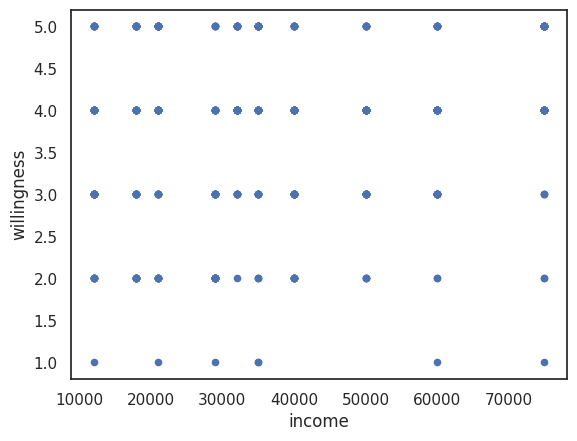

In [5]:
data.plot(kind="scatter", x="income", y="willingness")

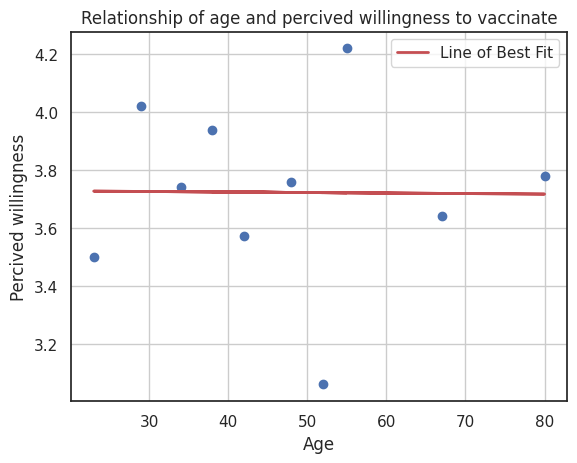

In [20]:
draw_graph('age_2','willingness','name','Age','Percived willingness','Relationship of age and percived willingness to vaccinate',data)

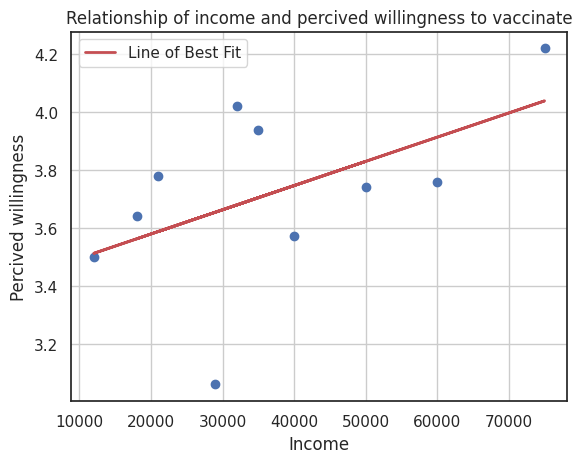

In [21]:
draw_graph('income','willingness','name','Income','Percived willingness','Relationship of income and percived willingness to vaccinate',data)

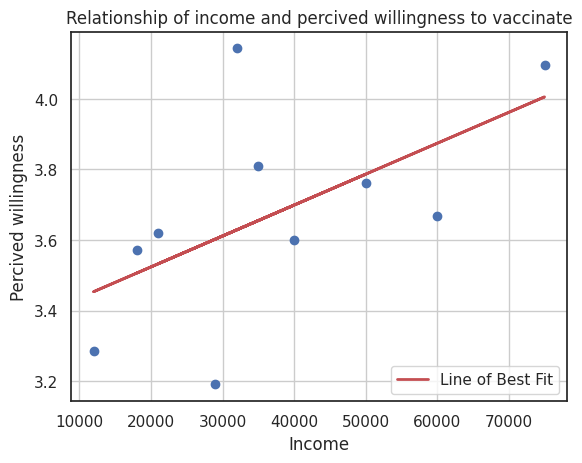

In [22]:
filtered_data = data[data['gender'] == 'Male']


draw_graph('income','willingness','name','Income','Percived willingness','Relationship of income and percived willingness to vaccinate',filtered_data)


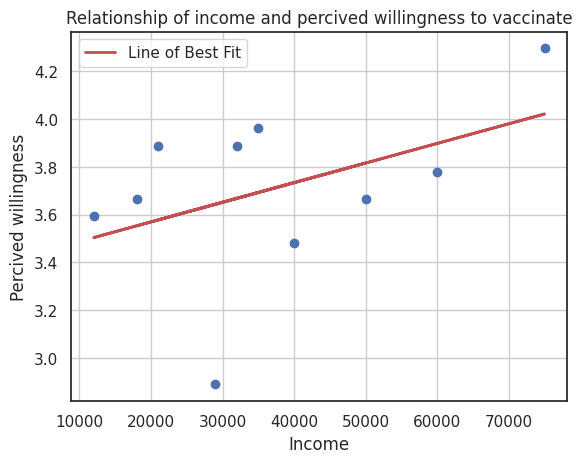

In [23]:
filtered_data = data[data['gender'] == 'Female']


draw_graph('income','willingness','name','Income','Percived willingness','Relationship of income and percived willingness to vaccinate',filtered_data)